***
# <center>YouTube Spam Comments Fiter Project</center>
### -Shrey Aggarwal
### September 19, 2021
***

I am going to classify comments in YouTube videos as spam/ham.
<br>
The data contains information about comments on videos from artists Psy, KatyPerry, LMFAO, Eminem, and Shakira.
<br>
data source: https://www.kaggle.com/lakshmi25npathi/images

## Data Extraction and Exploration

Import important libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Extracting the first file with artist- Psy

In [2]:
yt01 = pd.read_csv('Dataset/Youtube01-Psy.csv')
yt01.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


This data set has 5 columns out of which 'CONTENT' contains the comments, 'CLASS' contains the label to be classified. 'COMMENT_ID', 'AUTHOR', and 'DATE' are not very usefull for spam filtering

In [3]:
yt01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  350 non-null    object
 1   AUTHOR      350 non-null    object
 2   DATE        350 non-null    object
 3   CONTENT     350 non-null    object
 4   CLASS       350 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 13.8+ KB


Extracting rest of the files and displaying only first 2 rows:

In [4]:
yt02 = pd.read_csv('Dataset/Youtube02-KatyPerry.csv')
yt03 = pd.read_csv('Dataset/Youtube03-LMFAO.csv')
yt04 = pd.read_csv('Dataset/Youtube04-Eminem.csv')
yt05 = pd.read_csv('Dataset/Youtube05-Shakira.csv')

yt02.head(2)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12pgdhovmrktzm3i23es5d5junftft3f,lekanaVEVO1,2014-07-22T15:27:50,i love this so much. AND also I Generate Free ...,1
1,z13yx345uxepetggz04ci5rjcxeohzlrtf4,Pyunghee,2014-07-27T01:57:16,http://www.billboard.com/articles/columns/pop-...,1


In [5]:
yt03.head(2)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13uwn2heqndtr5g304ccv5j5kqqzxjadmc0k,Corey Wilson,2015-05-28T21:39:52.376000,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...",0
1,z124jvczaz3dxhnbc04cffk43oiugj25yzo0k,Epic Gaming,2015-05-28T20:07:20.610000,wierd but funny﻿,0


In [6]:
yt04.head(2)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,1
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,0


In [7]:
yt05.head(2)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29T02:30:18.971000,Nice song﻿,0
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ﻿,0


Creating a column containing artist's name in each data frame before concantating them.

In [8]:
yt01['Artist'] = 'Psy'
yt02['Artist'] = 'KatyPerry'
yt03['Artist'] = 'LMFAO'
yt04['Artist'] = 'Eminem'
yt05['Artist'] = 'Shakira'
yt01.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,Artist
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1,Psy
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1,Psy
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1,Psy
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,Psy
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1,Psy


In [9]:
yt = pd.concat([yt01,yt02,yt03,yt04,yt05])
yt.head(9)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,Artist
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1,Psy
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1,Psy
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1,Psy
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,Psy
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1,Psy
5,LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc,Jason Haddad,2013-11-26T02:55:11,"Hey, check out my new website!! This site is a...",1,Psy
6,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27T21:39:24,Subscribe to my channel ﻿,1,Psy
7,z122wfnzgt30fhubn04cdn3xfx2mxzngsl40k,Bob Kanowski,2013-11-28T12:33:27,i turned it on mute as soon is i came on i jus...,0,Psy
8,z13ttt1jcraqexk2o234ghbgzxymz1zzi04,Cony,2013-11-28T16:01:47,You should check my channel for Funny VIDEOS!!﻿,1,Psy


Dropping 'COMMENT_ID', 'AUTHOR', and 'DATE' from dataframe.

In [10]:
yt.drop('COMMENT_ID', axis = 1, inplace = True)
yt.drop('AUTHOR', axis = 1, inplace = True)
yt.drop('DATE', axis = 1, inplace = True)

There is a small class imbalance for artists LMFAO, Eminem, and Shakira. This can potentially be used for classification

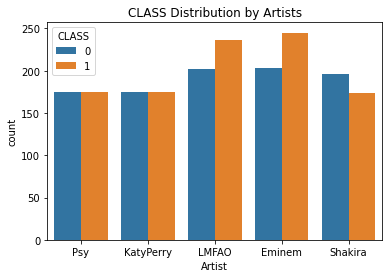

In [11]:
sns.countplot(x = 'Artist', hue = 'CLASS', data = yt)
plt.title('CLASS Distribution by Artists')
plt.show()

Creating a column with length of comments

In [12]:
yt['Length'] = yt['CONTENT'].apply(len)
yt.head()

,CONTENT,CLASS,Artist,Length
0,"Huh, anyway check out this you[tube] channel: ...",1,Psy,56
1,Hey guys check out my new channel and our firs...,1,Psy,166
2,just for test I have to say murdev.com,1,Psy,38
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,Psy,48
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1,Psy,39


Spams (CLASS = 0) have more counts compared to hams for lengths nearly above 200

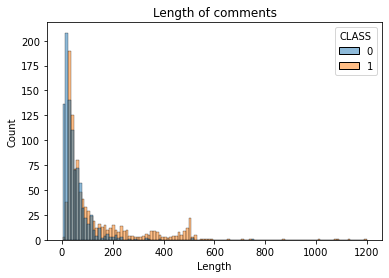

In [13]:
sns.histplot(x = 'Length', data = yt, hue = 'CLASS')
plt.title('Length of comments')
plt.show()

## Text Processing
Processing the 'CONTENT' to remove punctuations and stopwords. Analyzing words common in url's and their prevelance in spam comments

Importing libraries and downloading stopwords

In [14]:
import nltk
import string

in NLTK Downloader, enter d to download or l to see list of identifiers in nltk. next, enter 'stopwords', and then enter 'q' to quit.

In [15]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


        C:\Users\shrey\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [16]:
from nltk.corpus import stopwords

Lets get the first comment for Katy Perry in the dataframe and remove puncuations from it. Note that all characters are converted to lower cases.

In [17]:
comment = yt[yt['Artist'] == 'KatyPerry']['CONTENT'].iloc[0]
comment

'i love this so much. AND also I Generate Free Leads on Auto Pilot &amp; You Can  Too! http://www.MyLeaderGate.com/moretraffic\ufeff'

This comment has no punctuations now. 
<br>The link at the end is joined together. It would be better to insert spaces where the puncuations were to get words like https, www, com, etc. This will help us as these url keywords might be more common in spams.

In [18]:
comm_nopunc = [char for char in comment if char not in string.punctuation]
comm_nopunc = ''.join(comm_nopunc).lower() # joining the list of words into a string and converting to lower case
comm_nopunc

'i love this so much and also i generate free leads on auto pilot amp you can  too httpwwwmyleadergatecommoretraffic\ufeff'

With this loop, I inserted spaces in space of punctuations. How the classifier can see which comments have key words common in urls

In [19]:
a_nopunc = ''
for char in comment:
    if char not in string.punctuation:
        a_nopunc = a_nopunc + char        
    else:
        a_nopunc = a_nopunc + ' '
a_nopunc

'i love this so much  AND also I Generate Free Leads on Auto Pilot  amp  You Can  Too  http   www MyLeaderGate com moretraffic\ufeff'

Let's see the list of stopwords in the comment with no punctuations:

In [20]:
stopwords_in_comm = [word for word in a_nopunc.split() if word in stopwords.words('english')]
stopwords_in_comm

['i', 'this', 'so', 'on']

Removing these stopwords and showing the cleaned comment:

In [21]:
comm_cleaned = [word for word in comm_nopunc.split() if word not in stopwords.words('english')]
print(comm_cleaned)

['love', 'much', 'also', 'generate', 'free', 'leads', 'auto', 'pilot', 'amp', 'httpwwwmyleadergatecommoretraffic\ufeff']


Making a function combining the above steps

In [22]:
def text_process(comm):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Converts to lower case
    4. Returns a list of the cleaned text
    '''
    a_nopunc = ''
    for char in comm:
        if char not in string.punctuation:
            a_nopunc = a_nopunc + char
        else:
            a_nopunc = a_nopunc + ' '
    
    a_nopunc = ''.join(a_nopunc).lower()
    
    a_noSW = [word for word in a_nopunc.split() if word not in stopwords.words('english')]
    return a_noSW;

Getting another comment and applying the processing its text as an example:

In [23]:
yt['CONTENT'].iloc[1]

"Hey guys check out my new channel and our first vid THIS IS US THE  MONKEYS!!! I'm the monkey in the white shirt,please leave a like comment  and please subscribe!!!!"

In [24]:
print(text_process(yt['CONTENT'].iloc[1]))

['hey', 'guys', 'check', 'new', 'channel', 'first', 'vid', 'us', 'monkeys', 'monkey', 'white', 'shirt', 'please', 'leave', 'like', 'comment', 'please', 'subscribe']


## More data exploration with processed text:
The text_process function successfully removes punctuations and stopwords, while preserving words common in links and urls. 
<br> Lets see how prevelant these urls and some other words are in spams and hams:

Creating a function to detect common url words and other keywords like 'subscribe'. 

In [25]:
def url_detect(mess,url):
    ''' 
    Takes in a list of words, then performs the following:
    1. Determine if message has a url using common url terms
    2. Return 0 (as Flase) or 1 (as True). 
    '''
    a_processed = text_process(mess)
    
    flag = 0 # flag contains information wether any words in url has been encountered
    for word in a_processed:
        if word in url:
            flag = 1 # in this loop, every word is searched in the comments and flagged if it is in url
    return flag;

In [26]:
url_words = ['https', 'www', 'com','channel', 'subscribe']

In [27]:
yt['Has_URL'] = yt['CONTENT'].apply(url_detect, url = url_words)
yt.head()

,CONTENT,CLASS,Artist,Length,Has_URL
0,"Huh, anyway check out this you[tube] channel: ...",1,Psy,56,1
1,Hey guys check out my new channel and our firs...,1,Psy,166,1
2,just for test I have to say murdev.com,1,Psy,38,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,Psy,48,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1,Psy,39,0


The words in url_words are significantly more common in spams. This suggests that comments can be classified as hams/spams by transforming comments with CountVectorizer. Words like those in url_words will help classification.

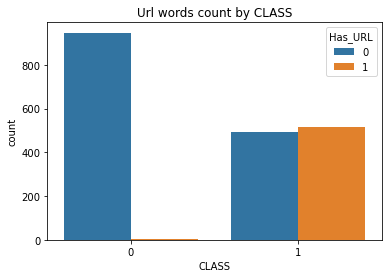

In [28]:
sns.countplot(x = 'CLASS', hue = 'Has_URL', data = yt)
plt.title('Url words count by CLASS')
plt.show()

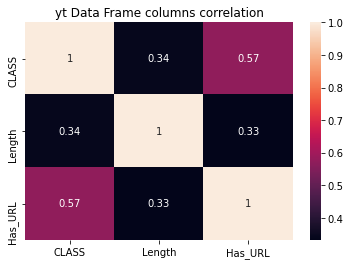

In [29]:
sns.heatmap(yt.corr(), annot = True)
plt.title('yt Data Frame columns correlation')
plt.show()

In [30]:
x = yt['CONTENT']
y = yt['CLASS']

## Vectorization

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
CV = CountVectorizer(analyzer=text_process).fit(x)
print('Total number of words after processing: ',len(CV.vocabulary_))

Total number of words after processing:  4735


In [33]:
CV_comments = CV.transform(x)
print('Shape of the data frame with comments: ', yt.shape)
print('Shape of the CountVectorized data: ',CV_comments.shape)

Shape of the data frame with comments:  (1956, 5)
Shape of the CountVectorized data:  (1956, 4735)


The data frame has 1956 comments. The CountVectorized data has the same number of rows, but columns are each word in the whole CV.vocabulary (total number of words after processing). the matrix has counts of each word in a given comment.
<br><br>Since the columns are every word in the whole set of comments, and since each comment has only few of these words, most of the columns are 0. Normally, a sparse matrix is outputted where columns with 0's are dropped for a given comment.
<br><br>
Here, I will convert this matrix into a data frame and show the columns where the 2nd comment (index = 1) has atleast 1 count.

In [34]:
count_vector = pd.DataFrame(CV_comments.toarray(),
                      columns=CV.get_feature_names())
count_vector.T[count_vector.T[1] != 0].T.head(5) #this data frame was transposed to make... 
#the words as rows and chosing words with atleast 1 count in 2nd sentence.

,channel,check,comment,first,guys,hey,leave,like,monkey,monkeys,new,please,shirt,subscribe,us,vid,white
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
count_vector.shape

(1956, 4735)

## TF-IDF

In [36]:
from sklearn.feature_extraction.text import TfidfTransformer

In [37]:
tfidf = TfidfTransformer().fit(CV_comments)

In [38]:
tfidf_comments = tfidf.transform(CV_comments)
print('Shape of the data in tfidf score: ', tfidf_comments.shape)

Shape of the data in tfidf score:  (1956, 4735)


The TfidfTransformer() creates a TF-IDF score for every word in a sentence. The rows and columns for this matrix is the same as CV_comments, but the data is the TF-IDF score instead of counts of words. More info on Tf-Idf: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer

In [39]:
tfidf_vector = pd.DataFrame(tfidf_comments.toarray(),
                      columns=CV.get_feature_names())
tfidf_vector.T[tfidf_vector.T[1] != 0].T.head(5) # same procedure that was applied for count_vector

,channel,check,comment,first,guys,hey,leave,like,monkey,monkeys,new,please,shirt,subscribe,us,vid,white
0,0.221162,0.155438,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.153454,0.107851,0.196991,0.22651,0.175785,0.183823,0.258771,0.143405,0.333372,0.351442,0.191127,0.297466,0.320552,0.147112,0.235453,0.302482,0.302482
2,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.248300,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.222261,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Train Test Split

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(tfidf_vector, y, test_size=0.2, random_state = 101)

print('Number of training data points: ', len(X_train))
print('Number of testing data points: ', len(X_test))

Number of training data points:  1564
Number of testing data points:  392


## Model + Evaluation



In [41]:
from sklearn.naive_bayes import MultinomialNB

In [42]:
mb = MultinomialNB()
mb.fit(X_train,y_train)

MultinomialNB()

In [43]:
pred = mb.predict(X_test)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

From the Confusion matrix and classification report, the classificaion model seems to be efficient. Number of corrrect prediction are significantly higher than number of wronf prediction. The final f1-score (0.92) is sufficiently high.

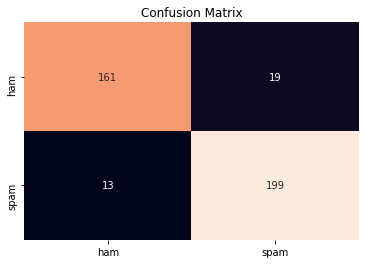

In [45]:
conf_mat = confusion_matrix(pred,y_test)
label = ['ham', 'spam']
conf = pd.DataFrame(conf_mat, index = label, columns = label)

sns.heatmap(conf, annot = True, fmt = 'g', cbar = False)
plt.title('Confusion Matrix')
plt.show()

In [46]:
print('Number of Corrrect Prediction = ', conf_mat[0,0]+conf_mat[1,1])
print('Number of wrong Prediction = ', conf_mat[0,1]+conf_mat[1,0])

Number of Corrrect Prediction =  360
Number of wrong Prediction =  32


In [47]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       180
           1       0.91      0.94      0.93       212

    accuracy                           0.92       392
   macro avg       0.92      0.92      0.92       392
weighted avg       0.92      0.92      0.92       392



## End of Notebook. Thank you!